In [2]:
%load_ext autoreload
%autoreload 2

## Data preprocessing

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import uniform_filter1d

from policy_iteration import policy_iteration
from value_iteration import value_iteration
from sarsa import sarsa
from q_learning import q_learning
from expected_sarsa import expected_sarsa

from model import Model
from world_config import cliff_world, small_world, grid_world
from plot_vp import plot_vp

In [22]:
def plot_mse_per_episode(mses, ylabel, alg_name):
    plt.plot(range(len(mses)), mses)
    plt.xlabel('Number of episode')
    plt.ylabel(ylabel)
    plt.title('Convergence of '+str(alg_name))
    plt.show()

## Question 1

#### Small world

  5%|▌         | 5/100 [00:00<00:06, 14.76it/s]


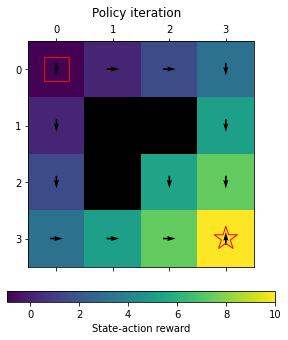

In [86]:
model = Model(small_world)
V, pi, mses = policy_iteration(model, n_episodes=100)
plot_vp(model, V, pi)
plt.suptitle('Policy iteration')
plt.show()

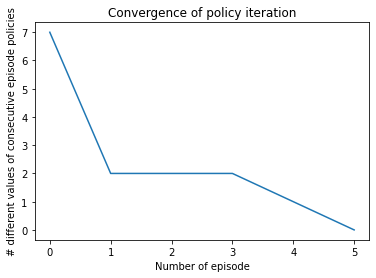

In [89]:
plot_mse_per_episode(mses, ylabel="# different values of consecutive episode policies", alg_name="policy iteration")

 17%|█▋        | 17/100 [00:00<00:01, 50.35it/s]


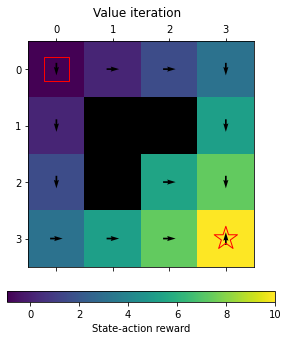

In [93]:
model = Model(small_world)
V, pi, mses = value_iteration(model, n_episodes=100)
plot_vp(model, V, pi)
plt.suptitle('Value iteration')
plt.show()

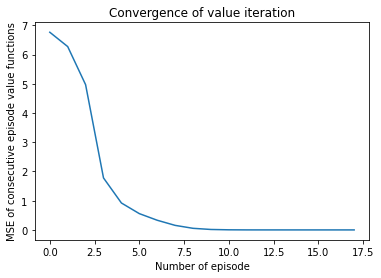

In [94]:
plot_mse_per_episode(mses, ylabel="MSE of consecutive episode value functions", alg_name="value iteration")

#### Cliff world

 12%|█▏        | 12/100 [00:04<00:36,  2.42it/s]


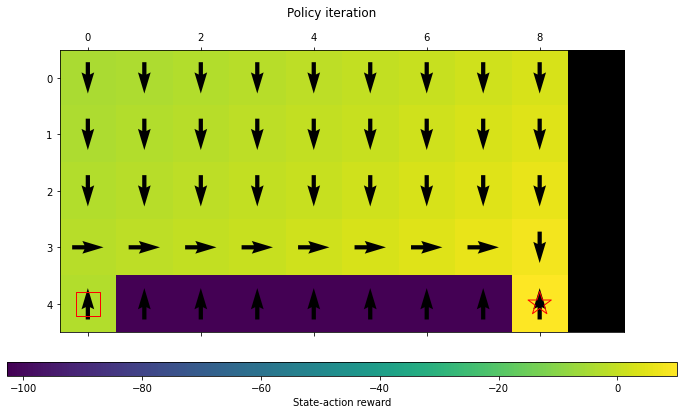

In [95]:
model = Model(cliff_world)
V, pi, mses = policy_iteration(model, n_episodes=100)
plot_vp(model, V, pi)
plt.suptitle('Policy iteration')
plt.show()

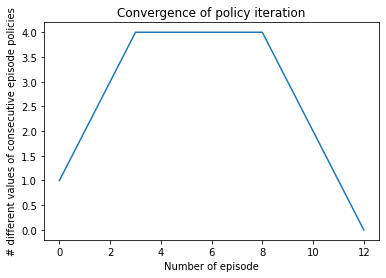

In [97]:
plot_mse_per_episode(mses, ylabel="# different values of consecutive episode policies", alg_name="policy iteration")

 13%|█▎        | 13/100 [00:01<00:12,  7.01it/s]


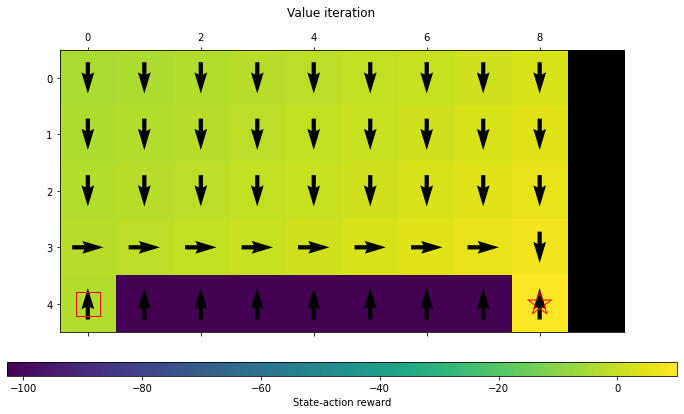

In [98]:
model = Model(cliff_world)
V, pi, mses = value_iteration(model, n_episodes=100)
plot_vp(model, V, pi)
plt.suptitle('Value iteration')
plt.show()

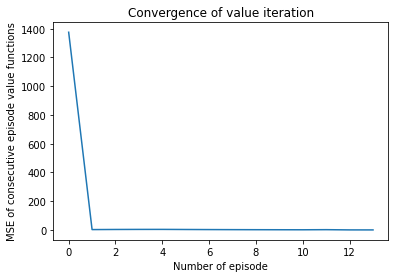

In [99]:
plot_mse_per_episode(mses, ylabel="MSE of consecutive episode value functions", alg_name="value iteration")

#### Grid world

  9%|▉         | 9/100 [00:23<04:01,  2.65s/it]


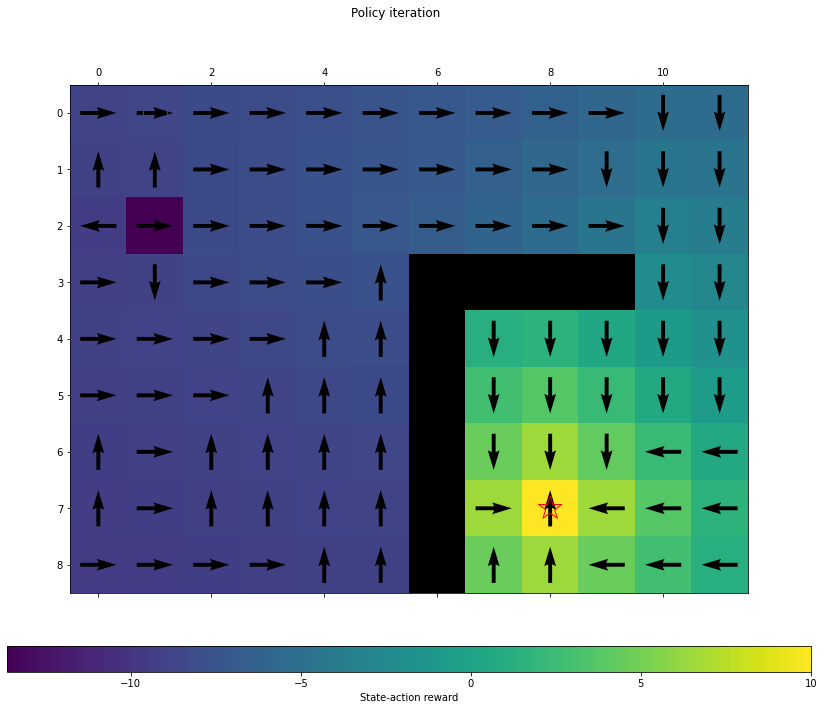

In [102]:
model = Model(grid_world)
V, pi, mses = policy_iteration(model, n_episodes=100)
plot_vp(model, V, pi)
plt.suptitle('Policy iteration')
plt.show()

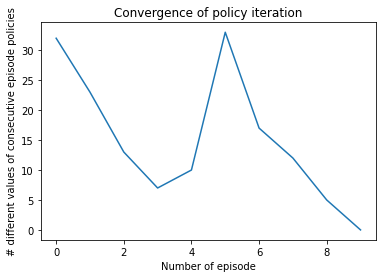

In [104]:
plot_mse_per_episode(mses, ylabel="# different values of consecutive episode policies", alg_name="policy iteration")

 33%|███▎      | 33/100 [00:22<00:45,  1.46it/s]


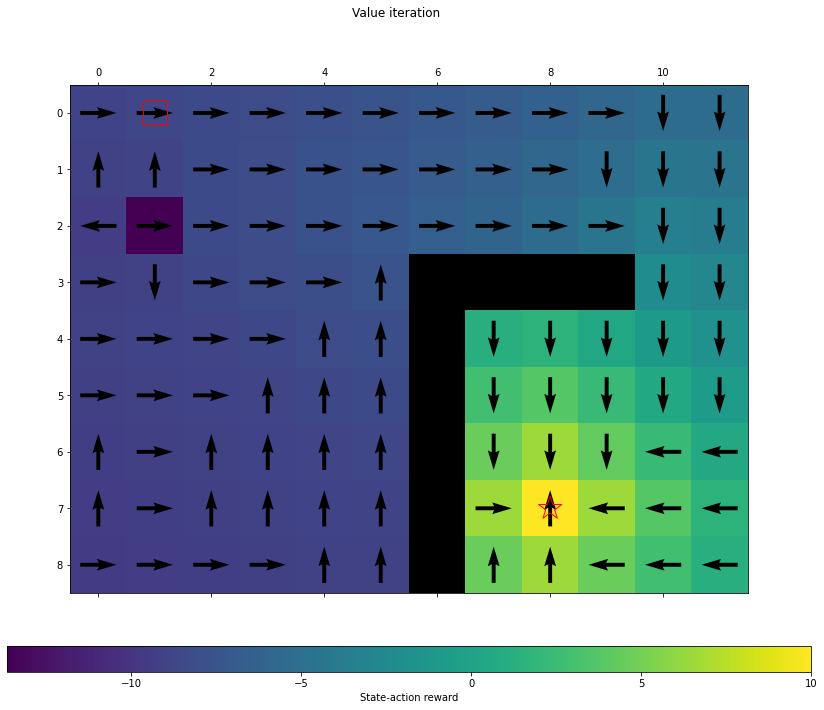

In [110]:
model = Model(grid_world)
V, pi, mses = value_iteration(model, n_episodes=100, tol=0.01)
plot_vp(model, V, pi)
plt.suptitle('Value iteration')
plt.show()

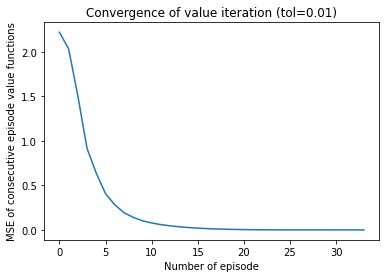

In [111]:
plot_mse_per_episode(mses, ylabel="MSE of consecutive episode value functions", alg_name="value iteration")

## Question 2

#### Exploration parameter: epsilon

100%|██████████| 500/500 [00:00<00:00, 1195.49it/s]


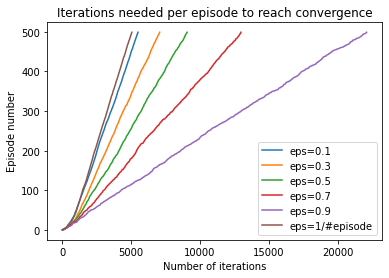

In [140]:
model = Model(small_world)
n_episodes = 500
maxit = 100

for eps in [0.1, 0.3, 0.5, 0.7, 0.9]:
    V, pi, cum_r, cum_iter = sarsa(model, n_episodes=n_episodes, maxit=maxit, epsilon=eps, decay_eps=False)
    plt.plot(cum_iter, range(n_episodes), label='eps='+str(eps))
V, pi, cum_r, cum_iter = sarsa(model, n_episodes=n_episodes, maxit=maxit, decay_eps=True)
plt.plot(cum_iter, range(n_episodes), label='eps=1/#episode')

plt.title("Iterations needed per episode to reach convergence")
plt.xlabel("Number of iterations")
plt.ylabel("Episode number")
plt.legend()
plt.show()

#### Learning rate: alpha

100%|██████████| 500/500 [00:00<00:00, 825.22it/s]


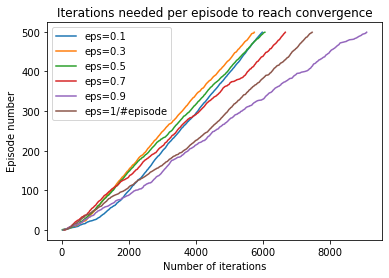

In [143]:
model = Model(small_world)
n_episodes = 500
maxit = 100

for alpha in [0.1, 0.3, 0.5, 0.7, 0.9]:
    V, pi, cum_r, cum_iter = sarsa(model, n_episodes=n_episodes, maxit=maxit, alpha=alpha, decay_alpha=False)
    plt.plot(cum_iter, range(n_episodes), label='eps='+str(alpha))
V, pi, cum_r, cum_iter = sarsa(model, n_episodes=n_episodes, maxit=maxit, decay_alpha=True)
plt.plot(cum_iter, range(n_episodes), label='eps=1/#episode')

plt.title("Iterations needed per episode to reach convergence")
plt.xlabel("Number of iterations")
plt.ylabel("Episode number")
plt.legend()
plt.show()

#### Number of episodes and iterations per episode

100%|██████████| 10/10 [00:00<00:00, 448.67it/s]


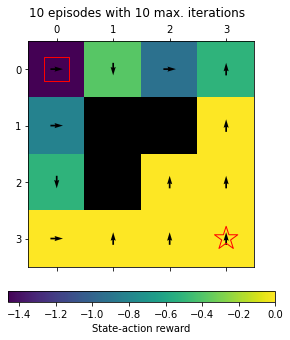

In [155]:
model = Model(small_world)
V, pi, _, _ = sarsa(model, n_episodes=10, maxit=10, alpha=0.3, decay_eps=True)
plot_vp(model, V, pi)
plt.suptitle("10 episodes with 10 max. iterations")
plt.show()

100%|██████████| 10/10 [00:00<00:00, 134.03it/s]


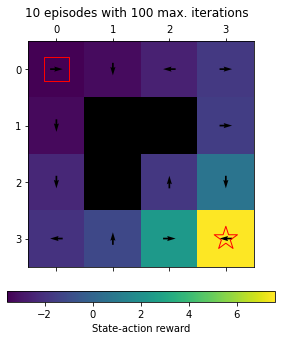

In [156]:
model = Model(small_world)
V, pi, _, _ = sarsa(model, n_episodes=10, maxit=100, alpha=0.3, decay_eps=True)
plot_vp(model, V, pi)
plt.suptitle("10 episodes with 100 max. iterations")
plt.show()

100%|██████████| 100/100 [00:00<00:00, 543.57it/s]


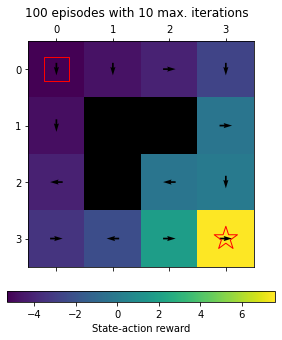

In [158]:
model = Model(small_world)
V, pi, _, _ = sarsa(model, n_episodes=100, maxit=10, alpha=0.3, decay_eps=True)
plot_vp(model, V, pi)
plt.suptitle("100 episodes with 10 max. iterations")
plt.show()

100%|██████████| 60/60 [00:00<00:00, 389.31it/s]


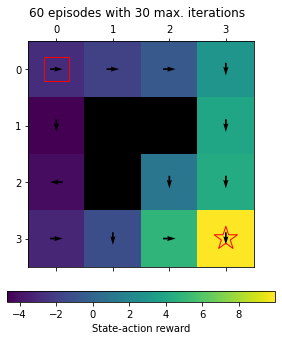

In [162]:
model = Model(small_world)
V, pi, _, _ = sarsa(model, n_episodes=60, maxit=30, alpha=0.3, decay_eps=True)
plot_vp(model, V, pi)
plt.suptitle("60 episodes with 30 max. iterations")
plt.show()

100%|██████████| 100/100 [00:00<00:00, 506.44it/s]


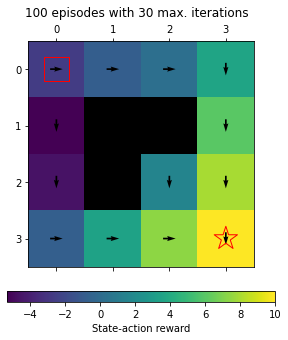

In [170]:
model = Model(small_world)
V, pi, _, _ = sarsa(model, n_episodes=100, maxit=30, alpha=0.3, decay_eps=True)
plot_vp(model, V, pi)
plt.suptitle("100 episodes with 30 max. iterations")
plt.show()

#### What happens if epsilon is too large or too small?

100%|██████████| 50/50 [00:00<00:00, 172.28it/s]


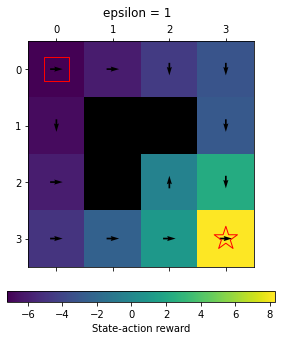

In [221]:
model = Model(small_world)
V, pi, _, _ = sarsa(model, n_episodes=50, maxit=30, epsilon=1)
plot_vp(model, V, pi)
plt.suptitle("epsilon = 1")
plt.show()

100%|██████████| 100/100 [00:00<00:00, 374.04it/s]


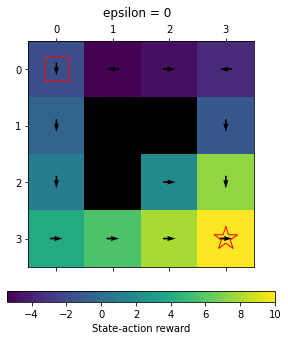

In [224]:
model = Model(small_world)
V, pi, _, _ = sarsa(model, n_episodes=100, maxit=30, epsilon=0)
plot_vp(model, V, pi)
plt.suptitle("epsilon = 0")
plt.show()

#### What happens if alpha is too large or too small?

100%|██████████| 100/100 [00:00<00:00, 303.72it/s]


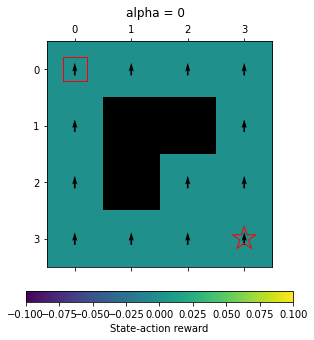

In [225]:
model = Model(small_world)
V, pi, _, _ = sarsa(model, n_episodes=100, maxit=30, alpha=0)
plot_vp(model, V, pi)
plt.suptitle("alpha = 0")
plt.show()

100%|██████████| 100/100 [00:00<00:00, 256.50it/s]


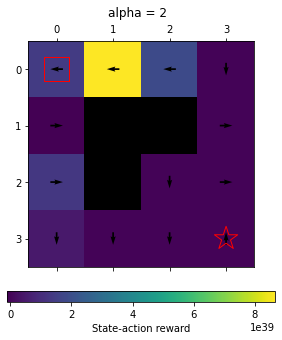

In [228]:
model = Model(small_world)
V, pi, _, _ = sarsa(model, n_episodes=100, maxit=30, alpha=2)
plot_vp(model, V, pi)
plt.suptitle("alpha = 2")
plt.show()

#### Expected SARSA

100%|██████████| 100/100 [00:00<00:00, 485.35it/s]


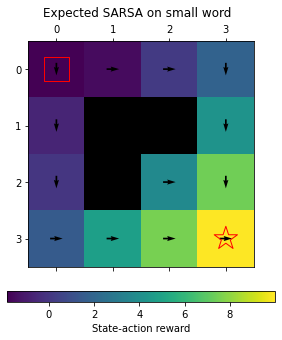

In [229]:
model = Model(small_world)
V, pi, _ = expected_sarsa(model, n_episodes=100, maxit=30, alpha=0.3)
plot_vp(model, V, pi)
plt.suptitle("Expected SARSA on small word")
plt.show()

100%|██████████| 2000/2000 [00:09<00:00, 219.58it/s]


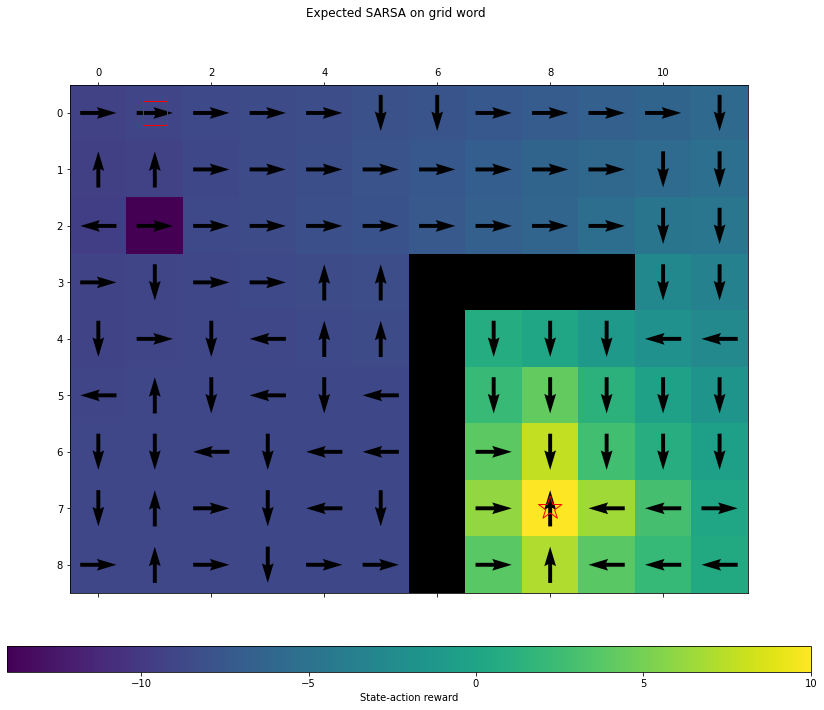

In [232]:
model = Model(grid_world)
V, pi, _ = expected_sarsa(model, n_episodes=2000, maxit=200, alpha=0.3)
plot_vp(model, V, pi)
plt.suptitle("Expected SARSA on grid word")
plt.show()

## Question 3

#### Explotation parameter: epsilon

100%|██████████| 500/500 [00:00<00:00, 1204.93it/s]


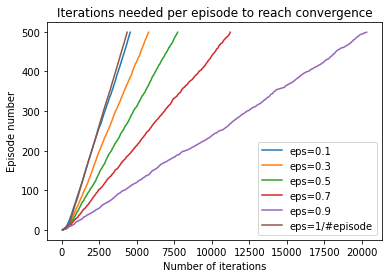

In [11]:
model = Model(small_world)
n_episodes = 500
maxit = 100

for eps in [0.1, 0.3, 0.5, 0.7, 0.9]:
    V, pi, cum_r, cum_iter = q_learning(model, n_episodes=n_episodes, maxit=maxit, epsilon=eps, decay_eps=False)
    plt.plot(cum_iter, range(n_episodes), label='eps='+str(eps))
V, pi, cum_r, cum_iter = q_learning(model, n_episodes=n_episodes, maxit=maxit, decay_eps=True)
plt.plot(cum_iter, range(n_episodes), label='eps=1/#episode')

plt.title("Iterations needed per episode to reach convergence")
plt.xlabel("Number of iterations")
plt.ylabel("Episode number")
plt.legend()
plt.show()

#### Learning rate: alpha

100%|██████████| 500/500 [00:00<00:00, 1119.04it/s]


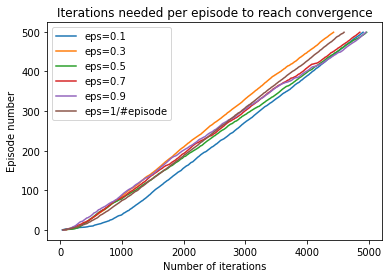

In [13]:
model = Model(small_world)
n_episodes = 500
maxit = 100

for alpha in [0.1, 0.3, 0.5, 0.7, 0.9]:
    V, pi, cum_r, cum_iter = q_learning(model, n_episodes=n_episodes, maxit=maxit, alpha=alpha, decay_alpha=False)
    plt.plot(cum_iter, range(n_episodes), label='eps='+str(alpha))
V, pi, cum_r, cum_iter = q_learning(model, n_episodes=n_episodes, maxit=maxit, decay_alpha=True)
plt.plot(cum_iter, range(n_episodes), label='eps=1/#episode')

plt.title("Iterations needed per episode to reach convergence")
plt.xlabel("Number of iterations")
plt.ylabel("Episode number")
plt.legend()
plt.show()

#### Number of episodes and iterations per episode

100%|██████████| 10/10 [00:00<00:00, 830.57it/s]


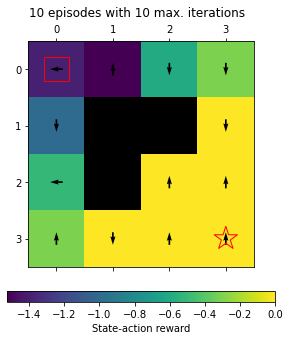

In [14]:
model = Model(small_world)
V, pi, _, _ = q_learning(model, n_episodes=10, maxit=10, alpha=0.3, decay_eps=True)
plot_vp(model, V, pi)
plt.suptitle("10 episodes with 10 max. iterations")
plt.show()

100%|██████████| 100/100 [00:00<00:00, 494.48it/s]


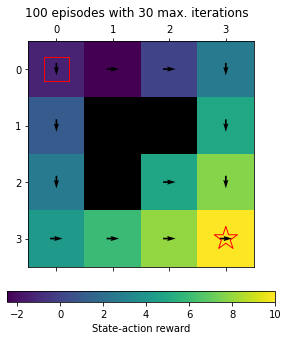

In [20]:
model = Model(small_world)
V, pi, _, _ = q_learning(model, n_episodes=100, maxit=30, alpha=0.3, decay_eps=True)
plot_vp(model, V, pi)
plt.suptitle("100 episodes with 30 max. iterations")
plt.show()

## Question 4

In [34]:
from scipy.ndimage.filters import uniform_filter1d

def plot_cum_rewards(cum_r_sarsa, cum_r_ql):
    y_sarsa = uniform_filter1d(cum_r_sarsa, size=200)
    y_ql = uniform_filter1d(cum_r_ql, size=200)

    plt.plot(range(len(y_sarsa)), y_sarsa, label='SARSA')
    plt.plot(range(len(y_ql)), y_ql, label='Q Learning')
    min_val = max(np.min(y_sarsa), np.min(y_ql))
    plt.ylim(min_val, 0)
    plt.xlabel("Number of episode")
    plt.ylabel("Cumulated reward")
    plt.title("Rewards obtained in each episode")
    plt.legend()
    plt.show()

In [62]:
model = Model(cliff_world)

V_sarsa, pi_sarsa, cumR_sarsa, _ = sarsa(model, n_episodes=10000, maxit=100, alpha=0.3, decay_eps=True)
V_ql, pi_ql, cumR_ql, _ = q_learning(model, n_episodes=10000, maxit=100, alpha=0.3, decay_eps=True)

100%|██████████| 10000/10000 [00:09<00:00, 1093.44it/s]


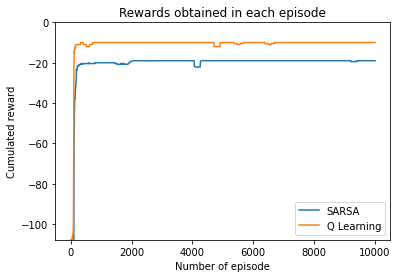

In [63]:
plot_cum_rewards(cumR_sarsa, cumR_ql)

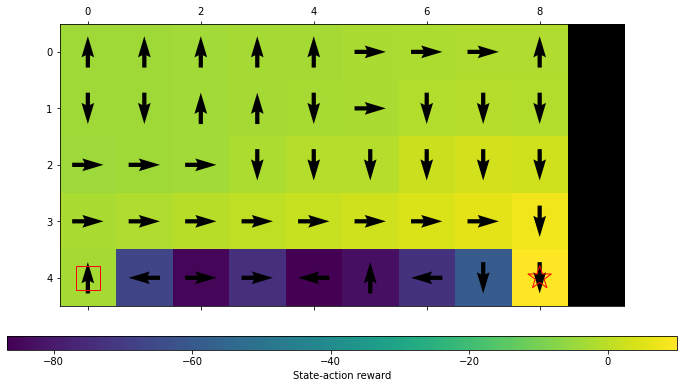

In [64]:
plot_vp(model, V_ql, pi_ql)
plt.show()

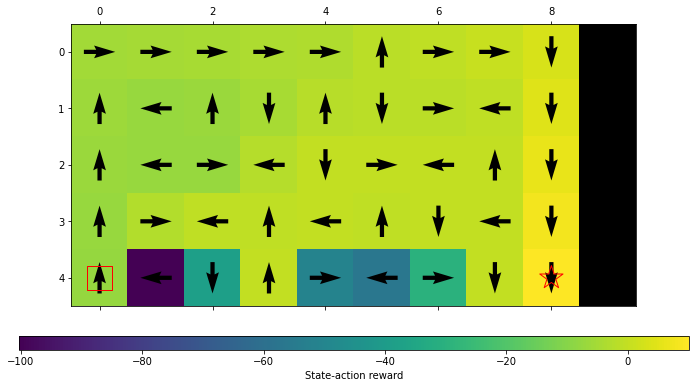

In [65]:
plot_vp(model, V_sarsa, pi_sarsa)
plt.show()

100%|██████████| 10000/10000 [00:13<00:00, 757.26it/s]


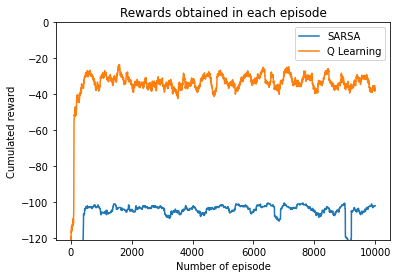

In [51]:
model = Model(cliff_world)

V_sarsa, pi_sarsa, cumR_sarsa, _ = sarsa(model, n_episodes=10000, maxit=100, alpha=0.2, epsilon=0.1)
V_ql, pi_ql, cumR_ql, _ = q_learning(model, n_episodes=10000, maxit=100, alpha=0.3, epsilon=0.1)

plot_cum_rewards(cumR_sarsa, cumR_ql)

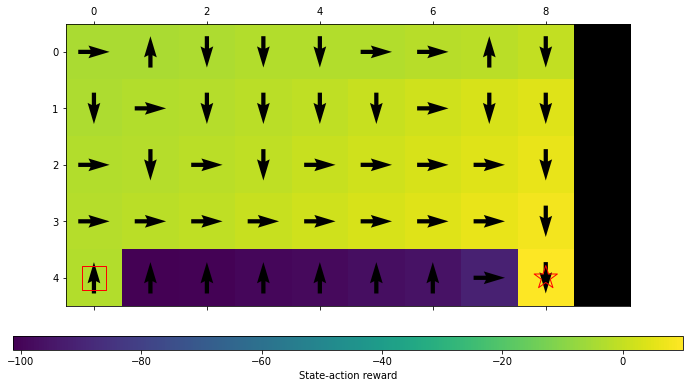

In [52]:
plot_vp(model, V_ql, pi_ql)
plt.show()

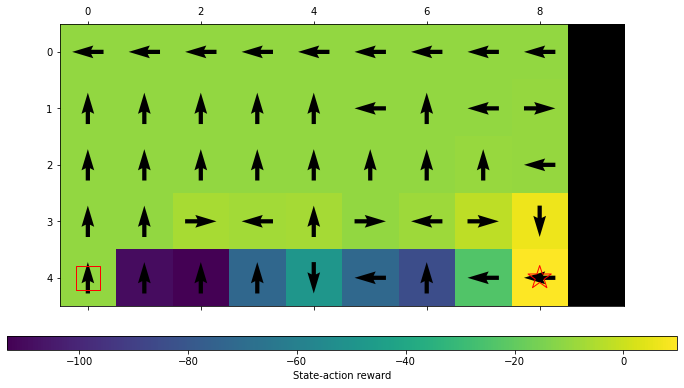

In [53]:
plot_vp(model, V_sarsa, pi_sarsa)
plt.show()

## Question 5